<a href="https://colab.research.google.com/github/Rioba-Ian/Deep_Learning/blob/main/OPTIMIZATION_MNIST_with_EarlyStopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimising a nueral network?
OPtimising a neural network or any model is like tuning a radio. There might be a million knobs to tune at the same time.


In [1]:
from IPython.display import Image
Image(url='https://media.giphy.com/media/YUuzJrSC7DJJEfxM8b/giphy.gif')

**Topics in Optimizing a neural network**

1. Understanding overfitting and underfitting.
2. Early stoppping
3. Regularisation
4. Dropout
5. Understanding Local and Global Minima
6. Batch vs Stochastic Gradient Descent
7. Random Initialization/Restart
8. Vanishing Gradient
9. Other Activation Functions


# Understanding overfitting and underfitting 
Overfitting is a scenario where the model performs extremely well on the training data but performs poorly on data seen during training. This means that the model has memorised the training data instead of learning the relationship between the features and labels. For the bias/variance tradeoff, overfitting is a situation when the model has high variance, memorizing the noise in the training dataset.
<br>

Underfitting is the counter to overfitting, the model produces a high bias. The situation means that the model is not sufficiently complex to capture the underlying relationship between the features and labels/or your model is strictly regularized. 

## Tensorboard
Tensorboard is an interface used in visualizing the graph and other tools in order to understand, debug and optimize a model. It is a UI for tensorflow but can be used for Keras and Pytorch.

## Validation data

The "validation set" is used with the term "test set" and referes to a sample of the dataset held back from training the model. 
<br>
We use the vvaidation to test the trained on unseen data. 

## Strategies to avoid overfitting/underfitting
You can combat overfitting by reducing the complexity of the model. We can do this by:
1. Use fewer layers/ shallower networks, fewer neurons per layer.
2. Using dropouts.
3. Using regularization
4. Early stopping in some cases. 
<br>

You can combat underfitting by:
* increasing the complexity of the model. By indreasing layers and number of neurons. More layers make the model learn the sophsicated relationships and perhaps perform well on difficult real-work tasks.

# Applying using the MNIST dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
# so that graphs are loaded into the notebook only
%matplotlib inline

import tensorflow as tf

In [3]:
# loading the MNIST dataset from tensorflow library
from tensorflow.keras.datasets import mnist 

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


label: 5
Digit in the image 0


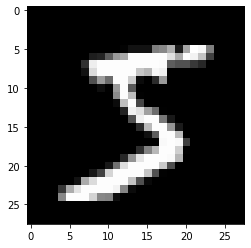

label: 0
Digit in the image 0


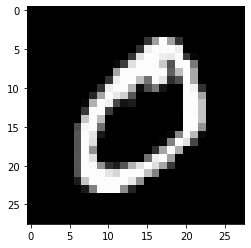

label: 4
Digit in the image 0


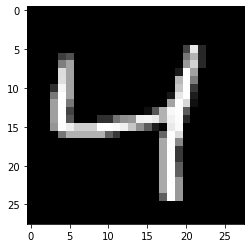

In [4]:
# let's see the first 3 images and their labels 
images = X_train[:3]
labels = y_train[:3]

for index, image in enumerate(images):
    print('label:', labels[index])
    print('Digit in the image', np.argmax(labels[index])) # argmax will take image with highest probability
    plt.imshow(image.reshape(28,28), cmap='gray')
    plt.show()

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.callbacks import TensorBoard 
from tensorflow.keras.utils import to_categorical 
from datetime import datetime 

In [6]:
#  why did we reshape?
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)


In [7]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

We shall begin with a neural network with only one input and output layer

In [8]:
# sequential just symbolises
model1 = Sequential()
# input layer
model1.add(Dense(50, activation='relu', input_shape=(784, )))

## we will use the softmax activation because this is a multiclass classification
# problem
# Softmax converts numbers into probabilities
model1.add(Dense(10, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001),
               metrics=['accuracy'])

In [9]:
# for tensorboard visualization 
logdir = 'logs/'+ datetime.now().strftime('%Y%m%d-%H%M%S')
tensorboard_callback = TensorBoard(log_dir=logdir)

In [10]:
training_history = model1.fit(
    X_train,
    y_train,
    batch_size = 32,
    verbose = 1,
    epochs = 10,
    validation_data = (X_test, y_test),
    callbacks = [tensorboard_callback],
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 4.1329 - accuracy: 0.3634 - val_loss: 1.1425 - val_accuracy: 0.6266
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1536 - accuracy: 0.6322 - val_loss: 0.9595 - val_accuracy: 0.6902
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9126 - accuracy: 0.7207 - val_loss: 0.7609 - val_accuracy: 0.8120
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6982 - accuracy: 0.8113 - val_loss: 0.6729 - val_accuracy: 0.8003
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6085 - accuracy: 0.8293 - val_loss: 0.6336 - val_accuracy: 0.8491
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5517 - accuracy: 0.8457 - val_loss: 0.5479 - val_accuracy: 0.8542
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5148 - accuracy: 0.8537 - val_loss: 0.6166 - val_accuracy:

Adding more layers to model

In [11]:
model2 = Sequential()
# 10 neurons layer
model2.add(Dense(10, activation='relu', input_shape=(784, )))

# many 512 neuron layer
model2.add(Dense(512, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001),
               metrics=['accuracy'])

In [12]:
logdir = 'logs/' + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

In [13]:
training_history = model2.fit(
    X_train, 
    y_train,
    batch_size = 32,
    verbose = 1,
    epochs = 10,
    validation_data = (X_test, y_test),
    callbacks = [tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 1.0372 - accuracy: 0.6461 - val_loss: 0.3713 - val_accuracy: 0.8809
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3464 - accuracy: 0.8913 - val_loss: 0.3011 - val_accuracy: 0.9099
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2640 - accuracy: 0.9175 - val_loss: 0.2525 - val_accuracy: 0.9239
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2169 - accuracy: 0.9318 - val_loss: 0.2172 - val_accuracy: 0.9338
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1953 - accuracy: 0.9391 - val_loss: 0.2121 - val_accuracy: 0.9344
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1726 - accuracy: 0.9457 - val_loss: 0.1826 - val_accuracy: 0.9432
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1565 - accuracy: 0.9509 - val_loss: 0.1851 -

Adding more layers increases the accuracy but might lead to overfitting or generalisation error

# Early stopping
When training a large network, there will be a point during the training when the model will stop generalizing and start learning statistical noise in the trainind dataset. 
<br>
The overfitting of the training dataset will result in an increase in generalization error, making the model less useful at making predictions on new data.
<br>
The challenge is to train a network long enough that it is fully capable to learn the mappings from the inputs to outputs, but not training the mdoel so long that it overfits the training data.
<br>

How to get through this:
<br>
* Either limit the number of epochs
* Use EarlyStopping criteria.
<br>
EarlyStopping will stop training at the point when the performance on a validation dataset starts to degrade.


In [18]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

Monitor for metric choosing, val_loss, val_acc
<br>
mode: by default it is auto and knows that you want to minimize loss or maximize accuracy
<br>
patience: number to epochs to wait before stopping it. If we are chasing the validation loss and we see it is not reducing from the last 50 epochs then we stop training

In [20]:
model3 = Sequential()
model3.add(Dense(128, activation='relu', input_shape=(784, )))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam',
               metrics=['accuracy'])

In [21]:
logdir = 'logs/' + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

In [22]:
training_history = model3.fit(
    X_train,
    y_train,
    batch_size = 32,
    verbose =1,
    epochs =10,
    validation_data = (X_test, y_test),
    callbacks = [tensorboard_callback, es]
)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3831 - accuracy: 0.8274 - val_loss: 0.2488 - val_accuracy: 0.9333
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2167 - accuracy: 0.9405 - val_loss: 0.1976 - val_accuracy: 0.9475
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1695 - accuracy: 0.9522 - val_loss: 0.1811 - val_accuracy: 0.9551
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1388 - accuracy: 0.9608 - val_loss: 0.1912 - val_accuracy: 0.9521
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1183 - accuracy: 0.9659 - val_loss: 0.1296 - val_accuracy: 0.9626
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0950 - accuracy: 0.9728 - val_loss: 0.1384 - val_accuracy: 0.9658
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0895 - accuracy: 0.9754 - val_loss: 0.1372 - val_accuracy:

In [23]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('OPTIMIZATION_MNIST_with_EarlyStopping.ipynb')

--2021-04-16 03:56:30--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2021-04-16 03:56:31 (34.7 MB/s) - ‘colab_pdf.py’ saved [1864/1864]

Mounted at /content/drive/




Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/OPTIMIZATION_MNIST_with_EarlyStopping.ipynb to pdf
[NbConvertApp] Support files will be in OPTIMIZATION_MNIST_with_EarlyStopping_files/
[NbConvertApp] Making directory ./OPTIMIZATION_MNIST_with_EarlyStopping_files
[NbConvertApp] Making directory ./OPTIMIZATION_MNIST_with_EarlyS

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'